In [61]:
from pycaret.utils import version
version()

'3.3.2'

### reading and cleaning data

In [62]:
import pandas as pd

In [63]:
df_ind = pd.read_csv('../data_ind.csv')
df_oecd = pd.read_csv('../data_oecd.csv')

In [64]:
df_oecd = df_oecd.sort_values(by=['Country', 'Time_Period'])
df_oecd['Time_Period'] = pd.to_datetime(df_oecd['Time_Period'], format='%Y-%m')

df_deu = df_oecd[(df_oecd['Country'] == 'DEU')]
df_usa = df_oecd[(df_oecd['Country'] == 'USA')]

df_ind['Time_Period'] = df_ind['Year'].astype(str) + '-' + df_ind['Quarter'].map({'-': '01', 'Q1': '02', 'Q3': '08'})
df_ind['Country'] = 'IND'  # Add country column
df_ind = df_ind[['Country', 'Time_Period', 'Unemployment_Rate']]
df_ind['Time_Period'] = pd.to_datetime(df_ind['Time_Period'], format='%Y-%m')

In [65]:
select_df_ind = df_ind[df_ind['Time_Period'].dt.year >= 2005]
select_df_deu = df_deu[df_deu['Time_Period'].dt.year >= 2005]
select_df_usa = df_usa[df_usa['Time_Period'].dt.year >= 2005]


### time series decomposition

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import matplotlib.pyplot as plt

In [67]:
select_df_ind = select_df_ind.drop(['Country'], axis=1)
select_df_ind['Time_Period'] = pd.to_datetime(select_df_ind['Time_Period'])
select_df_ind.set_index('Time_Period', inplace=True)
select_df_ind.index = pd.PeriodIndex(select_df_ind.index, freq='Q')

In [71]:
select_df_ind_ = select_df_ind.copy()  # Avoid modifying the original data
select_df_ind_.index = select_df_ind_.index.to_timestamp()  # Convert to datetime

In [74]:
select_df_deu = select_df_deu.drop(['Country'], axis=1)
select_df_deu['Time_Period'] = pd.to_datetime(select_df_deu['Time_Period'])
select_df_deu.set_index('Time_Period', inplace=True)
select_df_deu.index = pd.PeriodIndex(select_df_deu.index, freq='M')

In [75]:
select_df_deu_ = select_df_deu.copy()  # Avoid modifying the original data
select_df_deu_.index = select_df_deu_.index.to_timestamp()  # Convert to datetime

In [76]:
select_df_usa = select_df_usa.drop(['Country'], axis=1)
select_df_usa['Time_Period'] = pd.to_datetime(select_df_usa['Time_Period'])
select_df_usa.set_index('Time_Period', inplace=True)
select_df_usa.index = pd.PeriodIndex(select_df_usa.index, freq='M')

In [77]:
select_df_usa_ = select_df_usa.copy()  # Avoid modifying the original data
select_df_usa_.index = select_df_usa_.index.to_timestamp()  # Convert to datetime

In [78]:
# additive decomp 
add_decomp_ind = seasonal_decompose(select_df_ind_['Unemployment_Rate'], model='additive', period=2)
add_decomp_deu = seasonal_decompose(select_df_deu_['Unemployment_Rate'], model='additive', period=12)
add_decomp_usa = seasonal_decompose(select_df_usa_['Unemployment_Rate'], model='additive', period=12)

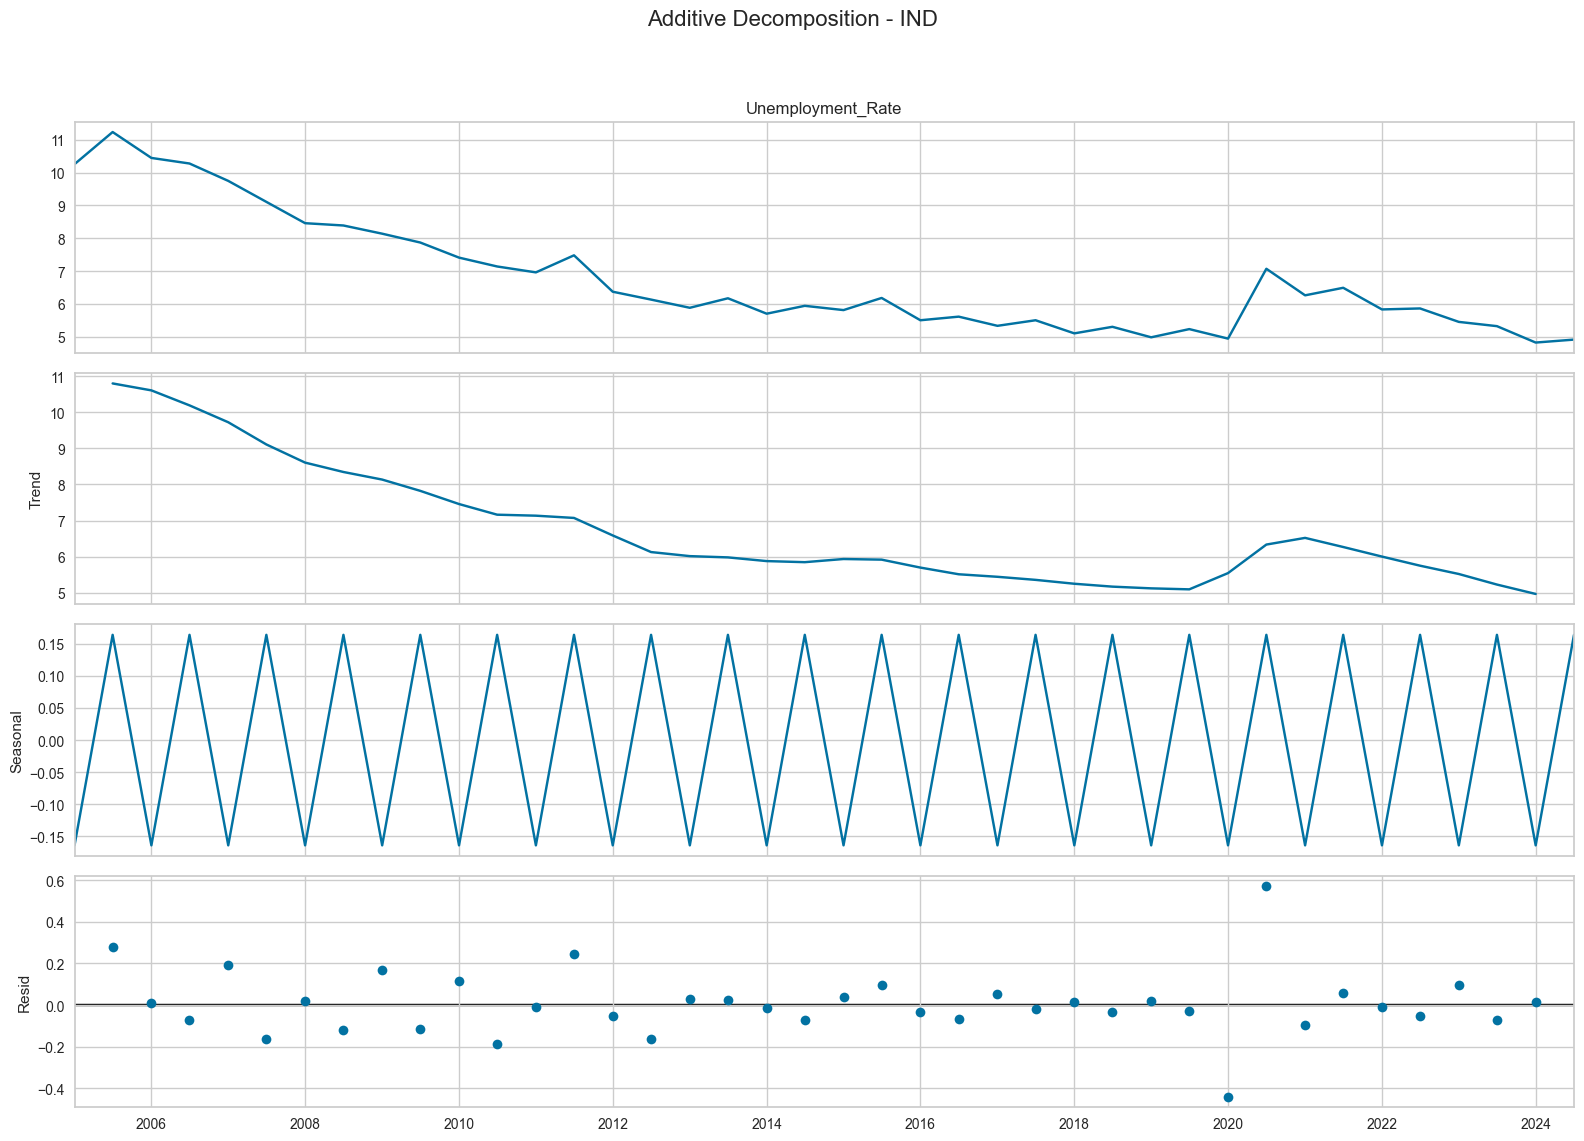

In [73]:
# Set figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

fig = add_decomp_ind.plot()
fig.suptitle('Additive Decomposition - IND', fontsize=16)

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

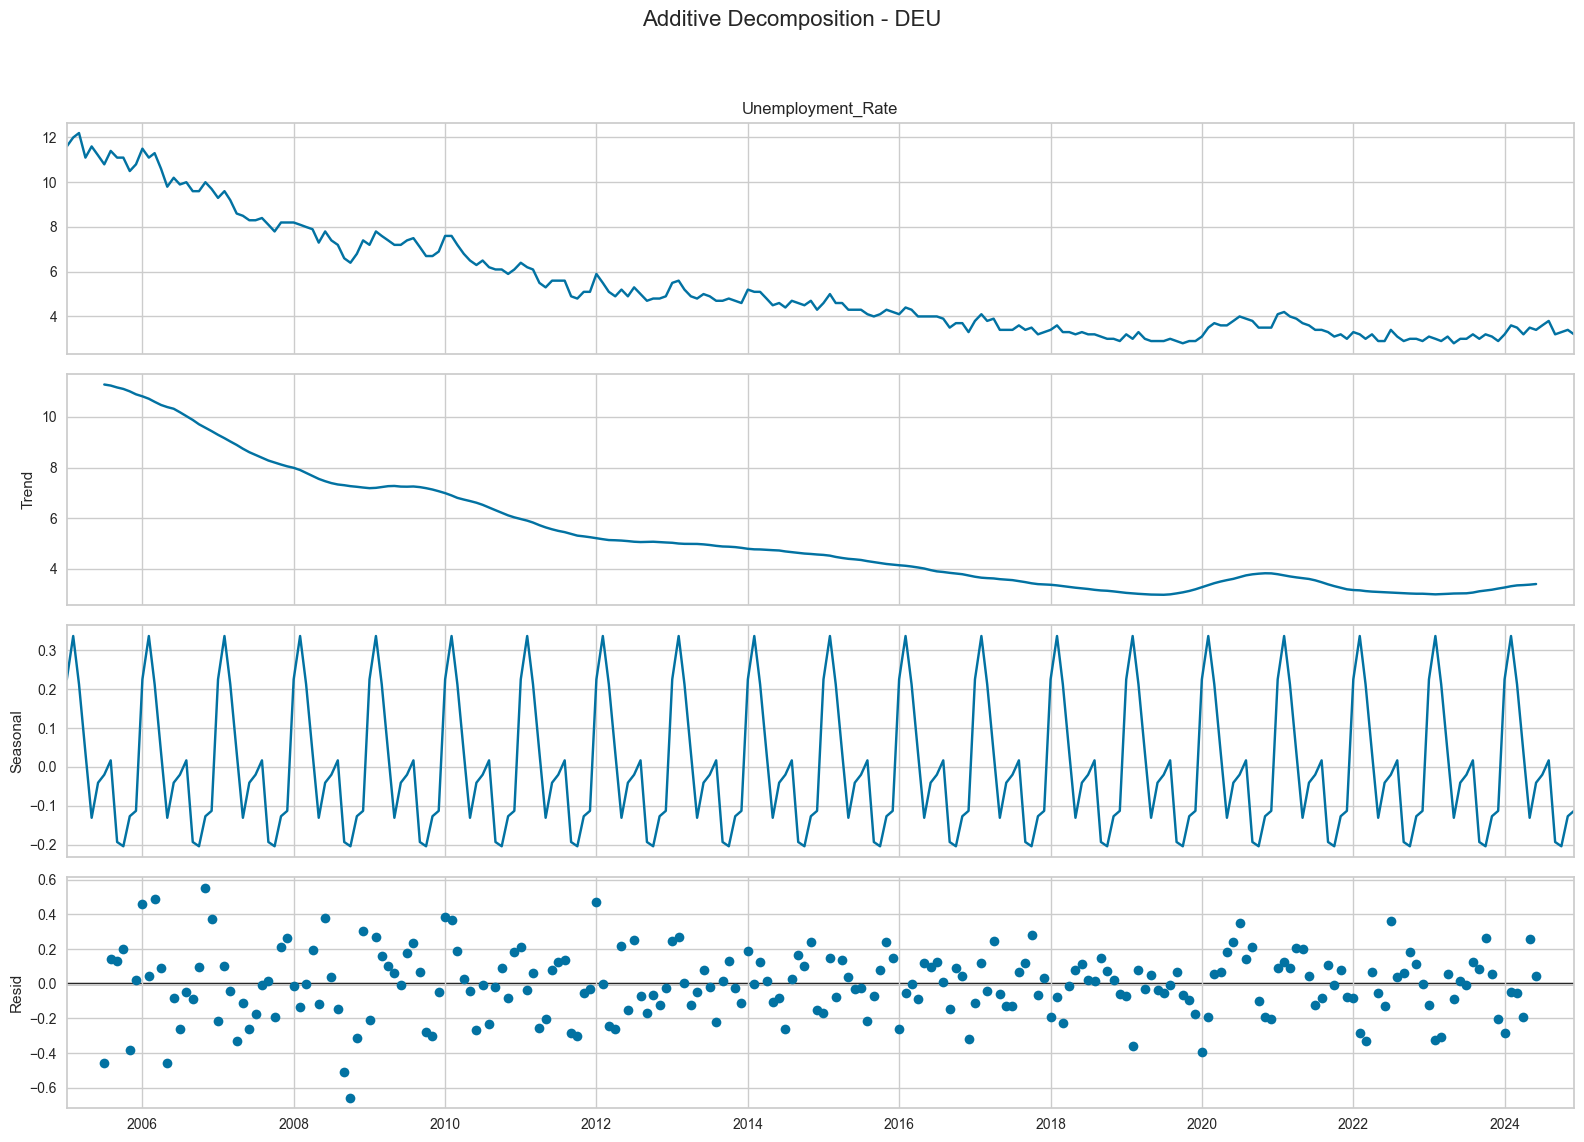

In [79]:
# Set figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

fig = add_decomp_deu.plot()
fig.suptitle('Additive Decomposition - DEU', fontsize=16)

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

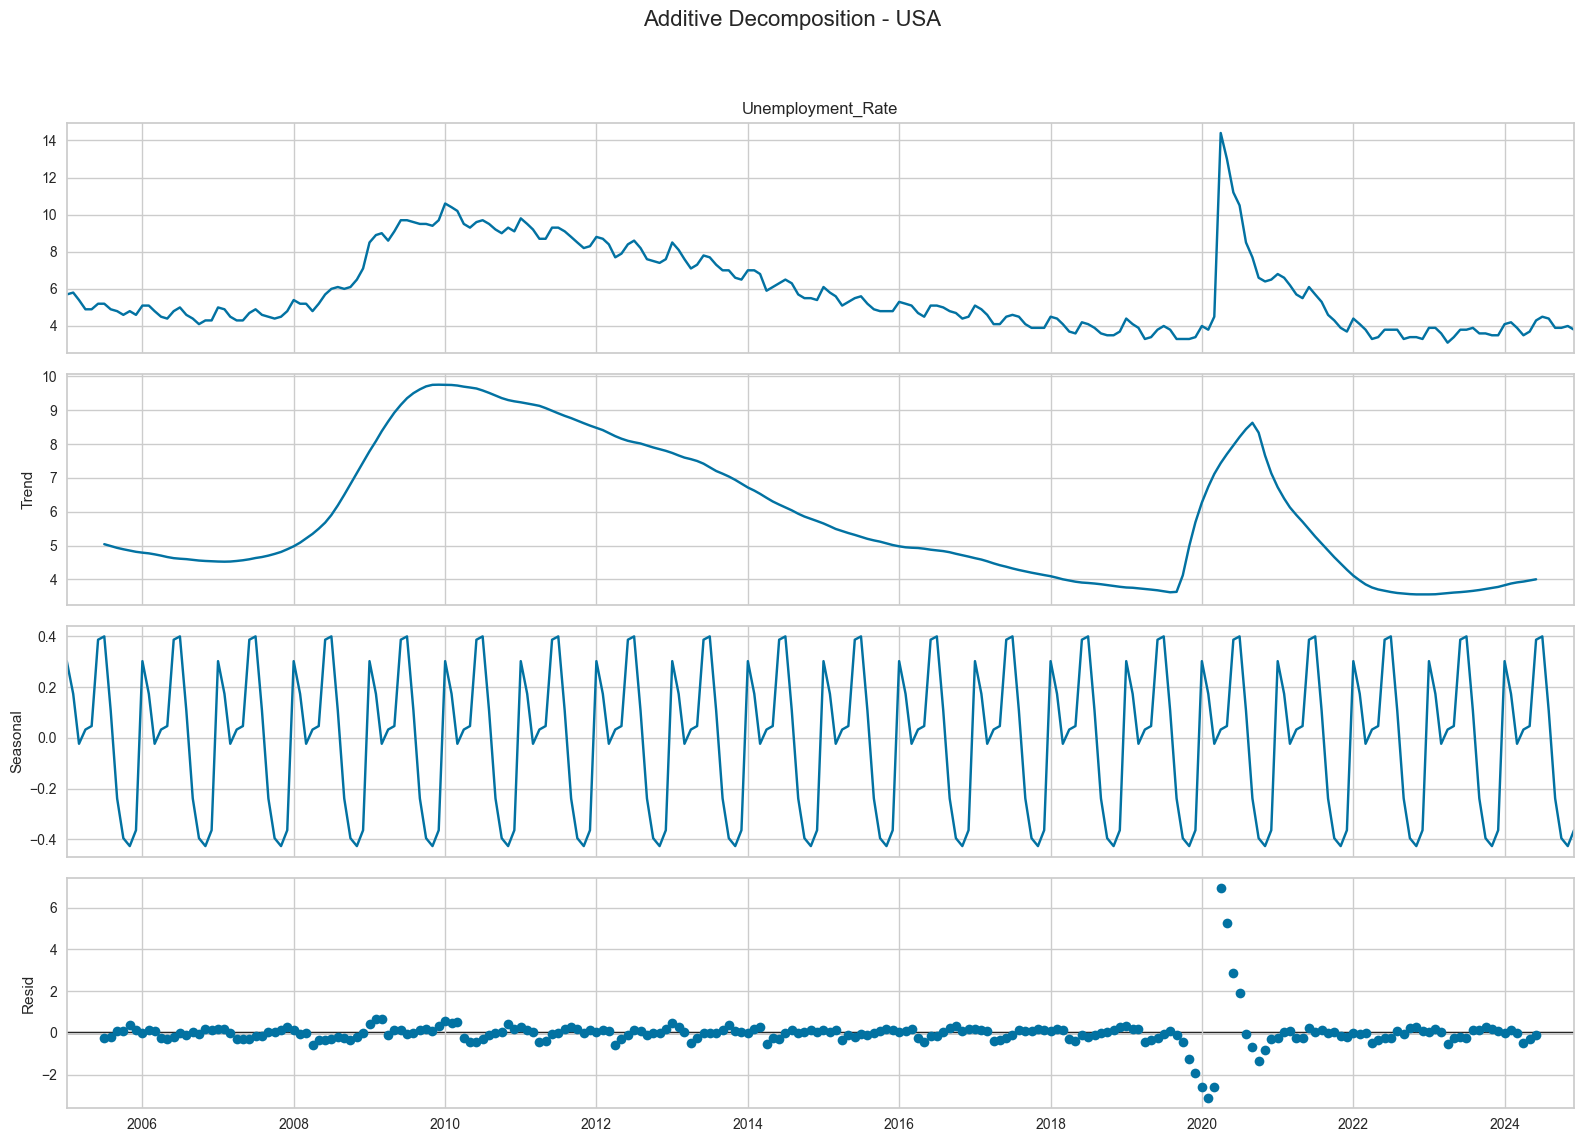

In [80]:
# Set figure size
plt.rcParams.update({'figure.figsize': (16, 12)})

fig = add_decomp_usa.plot()
fig.suptitle('Additive Decomposition - USA', fontsize=16)

# Adjust layout to prevent title overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### pycaret

In [22]:
from pycaret.time_series import *
import numpy as np

In [25]:
s_ind = setup(data=select_df_ind, target='Unemployment_Rate', fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Unemployment_Rate
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(40, 1)"
5,Transformed data shape,"(40, 1)"
6,Transformed train set shape,"(37, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [26]:
best_model_ind = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,1.9357,1.6814,0.7787,0.8227,0.1410,0.1321,-36.0141,0.0100
auto_arima,Auto ARIMA,2.0704,1.7553,0.8141,0.8324,0.1304,0.1461,-12.3155,0.4167
theta,Theta Forecaster,2.1728,1.8333,0.8627,0.8841,0.1365,0.1522,-13.2261,0.0133
naive,Naive Forecaster,2.2284,1.8783,0.8978,0.9270,0.1459,0.1545,-15.0108,0.9567
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,2.2368,1.9538,0.8733,0.9147,0.1404,0.1616,-17.6083,0.0300
arima,ARIMA,2.3212,1.9545,0.9398,0.9721,0.1548,0.1607,-17.5153,0.3367
exp_smooth,Exponential Smoothing,2.5209,2.0938,1.0278,1.0568,0.1670,0.1739,-23.1867,0.0167
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,2.5810,2.2152,1.0202,1.0593,0.1673,0.1903,-22.9658,0.0633
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,2.6001,2.2347,1.0169,1.0490,0.1633,0.1914,-22.7049,0.0867
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,2.6001,2.2347,1.0169,1.0490,0.1633,0.1914,-22.7049,0.0300


In [28]:
s_deu = setup(data=select_df_deu, target='Unemployment_Rate', fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Unemployment_Rate
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(240, 1)"
5,Transformed data shape,"(240, 1)"
6,Transformed train set shape,"(237, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [29]:
best_model_deu = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.1870,0.1731,0.1923,0.2240,0.0554,0.0566,-1.0631,55.3967
theta,Theta Forecaster,0.2094,0.1973,0.2151,0.2552,0.0607,0.0632,-1.3238,0.0233
exp_smooth,Exponential Smoothing,0.2144,0.1996,0.2202,0.2581,0.0622,0.0647,-1.4139,0.1233
ets,ETS,0.2144,0.1996,0.2202,0.2581,0.0622,0.0647,-1.4139,0.0600
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.2851,0.2739,0.2935,0.3547,0.0832,0.0893,-4.2191,0.0367
croston,Croston,0.2893,0.2673,0.2970,0.3455,0.0834,0.0885,-2.9129,0.3800
naive,Naive Forecaster,0.3023,0.2639,0.3111,0.3417,0.0896,0.0943,-3.7582,0.0367
arima,ARIMA,0.3023,0.2790,0.3111,0.3613,0.0889,0.0930,-4.6994,0.0733
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.3031,0.2692,0.3118,0.3484,0.0880,0.0943,-3.6345,0.0900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.3078,0.2671,0.3167,0.3458,0.0899,0.0960,-3.7011,0.0733


In [31]:
s_usa = setup(data=select_df_usa, target='Unemployment_Rate', fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Unemployment_Rate
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(240, 1)"
5,Transformed data shape,"(240, 1)"
6,Transformed train set shape,"(237, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
best_model_usa = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.8069,0.4397,0.2816,0.3404,0.0736,0.0703,-1.4606,0.0533
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.8268,0.4529,0.2885,0.3506,0.0756,0.0717,-1.5594,0.0267
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.8268,0.4529,0.2885,0.3506,0.0756,0.0717,-1.5594,0.0567
arima,ARIMA,0.8793,0.4929,0.3069,0.3816,0.0788,0.0766,-2.8670,0.3267
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9460,0.4610,0.3301,0.3572,0.0830,0.0837,-4.1060,0.0667
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.9466,0.4611,0.3303,0.3574,0.0830,0.0837,-4.1163,0.0267
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.9480,0.4615,0.3308,0.3577,0.0831,0.0838,-4.1384,0.0233
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9480,0.4615,0.3308,0.3577,0.0831,0.0838,-4.1384,0.0733
croston,Croston,0.9943,0.5027,0.3470,0.3890,0.0834,0.0869,-2.8779,0.0067
auto_arima,Auto ARIMA,1.0052,0.4734,0.3508,0.3671,0.0865,0.0898,-5.9491,0.5033
